In [ ]:
!pip3 install datasets
!pip3 uninstall transformers==4.20.1 y
!pip3 install transformers==4.22.1 q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00
Found existing installation: transformers 4.35.2
Uninstalling transformers-4.35.2:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.10/dist-packages/transformers-4.35.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/transformers/*
Proceed (Y/n)? y
  Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0


In [ ]:
import torch, os
import pandas as pd
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
ROOT_DIR = "../content"

df = pd.read_csv(ROOT_DIR+"/Final_Dataset_for_Sentimental_Analysis (1).csv")

print(df.shape)
df.head()

(12236, 2)


,text,label
0,nothing look forward lifei dont many reasons k...,mental health issues
1,im done trying feel betterthe reason im still ...,mental health issues
2,worried year old girl subject domestic physic...,mental health issues
3,hey rredflag sure right place post this goes ...,mental health issues
4,deserve liveif died right noone would carei re...,mental health issues


In [ ]:
df.dropna(inplace=True)
df.shape

(12226, 2)

In [ ]:
# test_df = test_df.dropna()
# texts = test_df["texts"].tolist()
# texts_encodings = tokenizer(texts, truncation=True, padding=True)

In [ ]:
labels = df["label"].unique().tolist()
labels = [s.strip() for s in labels]
labels

['mental health issues',
 'Positive',
 'Neutral',
 'Sex',
 'Offensive Language',
 'Hate Speech']

In [ ]:
NUM_LABELS = len(labels)
id2label = {id:label for id,label in enumerate(labels)}
label2id = {label:id for id,label in enumerate(labels)}

In [ ]:
id2label

{0: 'mental health issues',
 1: 'Positive',
 2: 'Neutral',
 3: 'Sex',
 4: 'Offensive Language',
 5: 'Hate Speech'}

In [ ]:
df["labels_mod"] = df.label.map(lambda x:label2id[x.strip()])
df.head()

,text,label,labels_mod
0,nothing look forward lifei dont many reasons k...,mental health issues,0
1,im done trying feel betterthe reason im still ...,mental health issues,0
2,worried year old girl subject domestic physic...,mental health issues,0
3,hey rredflag sure right place post this goes ...,mental health issues,0
4,deserve liveif died right noone would carei re...,mental health issues,0


<Axes: ylabel='labels_mod'>

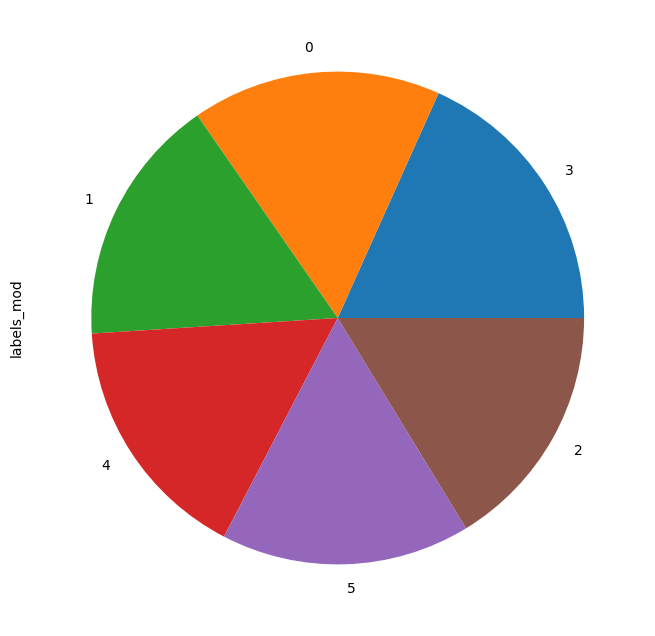

In [ ]:
df.labels_mod.value_counts().plot(kind="pie",figsize=(8,8))

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("distilbert-base-uncased",max_length=512)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.


In [ ]:
model = BertForSequenceClassification.from_pretrained("distilbert-base-uncased",num_labels=NUM_LABELS,id2label=id2label,label2id=label2id,max_length=512)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing BertForSequenceClassification: ['distilbert.transformer.layer.5.attention.q_lin.weight', 'distilbert.transformer.layer.2.attention.out_lin.weight', 'distilbert.transformer.layer.3.attention.q_lin.weight', 'distilbert.transformer.layer.3.ffn.lin1.weight', 'distilbert.transformer.layer.3.attention.k_lin.bias', 'distilbert.transformer.layer.5.attention.out_lin.bias', 'vocab_layer_norm.bias', 'distilbert.transformer.layer.1.attention.q_lin.bias', 'distilbert.embeddings.position_embeddings.weight', 'distilbert.transformer.layer.0.attention.out_lin.weight', 'distilbert.transformer.layer.2.sa_layer_norm.bias', 'distilbert.transformer.layer.4.attention.v_lin.bias', 'distilbert.transformer.layer.3.output_layer_norm.weight', 'distilbert.transformer.layer.5.sa_layer_norm.weight', 'distilbert.transformer.layer.5.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.

In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# # Split the data

# from sklearn.model_selection import train_test_split

In [ ]:
size = df.shape[0]

train_texts = list(df.text[:size//2])
val_texts = list(df.text[size//2:(3*size)//4])
test_texts = list(df.text[(3*size)//4:])

train_labels = list(df.labels_mod[:size//2])
val_labels = list(df.labels_mod[size//2:(3*size)//4])
test_labels = list(df.labels_mod[(3*size)//4:])

In [ ]:
len(train_texts)

6113

In [ ]:
train_encodings = tokenizer(train_texts,truncation=True,padding=True,max_length=50, add_special_tokens = True)
val_encodings = tokenizer(val_texts,truncation=True,padding=True,max_length=50, add_special_tokens = True)
test_encodings = tokenizer(test_texts,truncation=True,padding=True,max_length=50, add_special_tokens = True)


In [ ]:
class DataLoader(Dataset):
  def __init__(self,encodings,labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self,idx):
    item = {key:torch.tensor(val[idx]) for key,val in self.encodings.items()}
    item["labels"] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

In [ ]:
train_dataloader = DataLoader(train_encodings,train_labels)
val_dataloader = DataLoader(val_encodings,val_labels)
test_dataloader = DataLoader(test_encodings,test_labels)

In [ ]:
# training with trainer class

from transformers import TrainingArguments, Trainer

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)

  precision,recall,f1, _ = precision_recall_fscore_support(labels, preds,average="macro")

  acc = accuracy_score(labels,preds)

  return {
      'Accuracy':acc,
      "F1":f1,
      "Precision":precision,
      "Recall":recall
  }

In [ ]:
training_args = TrainingArguments(

          output_dir="./BertModel",
          do_train=True,
          do_eval=True,

          num_train_epochs=100,
          per_device_train_batch_size=64,
          per_device_eval_batch_size=128,

          warmup_steps = 100,
          weight_decay=0.01,
          logging_strategy="steps",

          logging_dir="./multi-class-logs",
          logging_steps=50,
          evaluation_strategy="steps",
          eval_steps=50,
          save_strategy="steps",
          fp16=False,
          load_best_model_at_end=True
)

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset=train_dataloader,
    eval_dataset=val_dataloader,
    compute_metrics = compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6113
  Num Epochs = 100
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 9600


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,1.139900,5.628183,0.000000,0.000000,0.000000,0.000000
100,0.773600,6.038548,0.000000,0.000000,0.000000,0.000000
150,0.530200,6.206783,0.015380,0.033476,0.022066,0.069322
200,0.454100,6.104347,0.032723,0.020563,0.011052,0.147493
250,0.327300,6.473548,0.035340,0.024506,0.013274,0.159292
300,0.202900,6.243282,0.036976,0.019218,0.010197,0.166667
350,0.171300,6.610754,0.032723,0.021084,0.011353,0.147493
400,0.146000,6.362558,0.036649,0.019096,0.010134,0.165192
450,0.095800,6.564331,0.036976,0.021066,0.011244,0.166667
500,0.066500,6.931873,0.036976,0.020438,0.010886,0.166667


***** Running Evaluation *****
  Num examples = 3056
  Batch size = 128
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
***** Running Evaluation *****
  Num examples = 3056
  Batch size = 128
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

TrainOutput(global_step=9600, training_loss=0.027849147669257945, metrics={'train_runtime': 2156.3853, 'train_samples_per_second': 283.484, 'train_steps_per_second': 4.452, 'total_flos': 1.570757466834e+16, 'train_loss': 0.027849147669257945, 'epoch': 100.0})

In [ ]:
# save the model

model_path = "distilbert-model"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

Saving model checkpoint to distilbert-model
Configuration saved in distilbert-model/config.json
Model weights saved in distilbert-model/pytorch_model.bin
tokenizer config file saved in distilbert-model/tokenizer_config.json
Special tokens file saved in distilbert-model/special_tokens_map.json


('distilbert-model/tokenizer_config.json',
 'distilbert-model/special_tokens_map.json',
 'distilbert-model/vocab.txt',
 'distilbert-model/added_tokens.json',
 'distilbert-model/tokenizer.json')

In [ ]:
q = [trainer.evaluate(eval_dataset=df) for df in [train_dataloader,val_dataloader,test_dataloader]]

pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

***** Running Evaluation *****
  Num examples = 6113
  Batch size = 128


***** Running Evaluation *****
  Num examples = 3056
  Batch size = 128
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
***** Running Evaluation *****
  Num examples = 3057
  Batch size = 128
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.028758,0.991657,0.985351,0.977746,0.993605
val,6.931873,0.036976,0.020438,0.010886,0.166667
test,4.340613,0.403009,0.131238,0.140399,0.123200


In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast



def predict(text):
  inputs = tokenizer(text,padding=True,truncation=True,max_length=512,return_tensors="pt").to("cuda")

  outputs = model(**inputs)

  probs = outputs[0].softmax(1)
  pred_label_idx = probs.argmax()

  pred_label = model.config.id2label[pred_label_idex.item()]

  return probs, pred_label_idx,pred_label

In [ ]:
# re-load saved model for inference

model_path = "distilbert-model"

model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizerFast.from_pretrained(model_path)
nlp = pipeline("sentiment-analysis",model=model,tokenizer=tokenizer)

loading configuration file distilbert-model/config.json
Model config BertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "dim": 768,
  "dropout": 0.1,
  "hidden_act": "gelu",
  "hidden_dim": 3072,
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "mental health issues",
    "1": "Positive",
    "2": "Neutral",
    "3": "Sex",
    "4": "Offensive Language",
    "5": "Hate Speech"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Hate Speech": 5,
    "Neutral": 2,
    "Offensive Language": 4,
    "Positive": 1,
    "Sex": 3,
    "mental health issues": 0
  },
  "layer_norm_eps": 1e-12,
  "max_length": 512,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "n_heads": 12,
  "n_layers": 6,
  "num_attention_heads": 12,
  "num_hidden_

#CustomTesting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path of your file in Google Drive
file_path_in_drive = '/content/drive/MyDrive/Greeshmanth/distilbert_sentiment_analysis.zip'  # Change this path

Mounted at /content/drive


In [ ]:
# Specify the destination path in Colab
destination_path = '/content/distilbert_sentiment_analysis.zip'

# Copy the file from Google Drive to Colab
!cp "{file_path_in_drive}" "{destination_path}"

# Unzip the file in Colab
with zipfile.ZipFile(destination_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Optionally, you can delete the zip file after extraction
os.remove(destination_path)

In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification

model_path = '/content/distilbert_sentiment_analysis'
model = DistilBertForSequenceClassification.from_pretrained(model_path)
tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)

In [ ]:
def predict_sentiment(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Get the predicted label
    predicted_label_id = torch.argmax(probabilities, dim=1).item()

    # Convert the predicted label id to label name
    predicted_label = id2label[predicted_label_id]

    return predicted_label

In [ ]:
id2label = {
    0: "mental health issues",
    1: "Positive",
    2: "Neutral",
    3: "Sex",
    4: "Offensive Language",
    5: "Hate Speech"
}

In [ ]:
custom_text = "I am happy."
print(f"Sentiment: {predict_sentiment(custom_text)}")

Sentiment: Offensive Language


In [ ]:
custom_text = "what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha ."
print(f"Sentiment: {predict_sentiment(custom_text)}")

Sentiment: Neutral


In [ ]:
custom_text = "fuck hard with fine pussy."
print(f"Sentiment: {predict_sentiment(custom_text)}")

Sentiment: Sex


In [ ]:
custom_text = "nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself."
print(f"Sentiment: {predict_sentiment(custom_text)}")

Sentiment: mental health issues


In [ ]:
custom_text = "Fuck YOu bitch."
print(f"Sentiment: {predict_sentiment(custom_text)}")

Sentiment: Hate Speech


In [ ]:
custom_text = "exactly the song was jamming when made this ."
print(f"Sentiment: {predict_sentiment(custom_text)}")

Sentiment: Positive


In [ ]:
custom_text = "Things going sweet"
print(f"Sentiment: {predict_sentiment(custom_text)}")

Sentiment: Positive


In [ ]:
custom_text = "Fuck YOu bitch."
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = "nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself."
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = "what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha ."
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = "I hate you."
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = "I am happy."
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = "im going bald making want kill myselfi  hairline redeced badly never get girlfriend look like fool people mock me life fucking shit"
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = "I am angry."
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = "exactly the song was jamming when made this ."
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = "I will kill him."
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = "can congress eliminate namo and blame advani ."
print(f"Sentiment: {predict_sentiment(custom_text)}")


print("-----------------------------")

custom_text = "i want to have sex with her ."
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = " why not have ama someone rescued uttarakhand government sure that more fiery "
print(f"Sentiment: {predict_sentiment(custom_text)}")


print("-----------------------------")

custom_text = "fuck hard with fine pussy."
print(f"Sentiment: {predict_sentiment(custom_text)}")

print("-----------------------------")

custom_text = "I feel like missing some person."
print(f"Sentiment: {predict_sentiment(custom_text)}")

Sentiment: Hate Speech
-----------------------------
Sentiment: mental health issues
-----------------------------
Sentiment: Neutral
-----------------------------
Sentiment: Hate Speech
-----------------------------
Sentiment: Offensive Language
-----------------------------
Sentiment: mental health issues
-----------------------------
Sentiment: Offensive Language
-----------------------------
Sentiment: Positive
-----------------------------
Sentiment: Hate Speech
-----------------------------
Sentiment: Neutral
-----------------------------
Sentiment: Sex
-----------------------------
Sentiment: Positive
-----------------------------
Sentiment: Sex
-----------------------------
Sentiment: Offensive Language
